<div class="alert alert-block alert-success">
<b>Imported libraries</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

sns.set(style = 'white')

# Change default pandas display options
pd.options.display.float_format = '{:,.2f}'.format

<div class="alert alert-block alert-info">
<b>Match the file name pattern with glob</b>
</div>

In [2]:
Happiness = sorted(glob('World Happiness Report - *.csv'))

Happiness

['World Happiness Report - 2018.csv', 'World Happiness Report - 2019.csv']

<div class="alert alert-block alert-info">
<b>Load the data concatenated</b>
</div>

In [3]:
# Concatenate both dataframes 
df = pd.concat((pd.read_csv(file).assign(filename = file) for file in Happiness), ignore_index = False)

# Replace the name to just a number to be possible to convert the variable
df['filename'].replace({'World Happiness Report - 2018.csv': '2018', 
                        'World Happiness Report - 2019.csv': '2019'}, inplace = True)

# Convert to datetime, it could use just the filename variable
df['date'] = pd.to_datetime(df['filename'], format = '%Y')

# Take the year from datetime
# df['year'] = df['date'].dt.year

df.set_index('date', inplace = True)
df.sort_index(inplace = True)

df.drop(['filename'], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 2018-01-01 to 2019-01-01
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


<div class="alert alert-block alert-info">
<b>Pivot table sorted by generosity</b>
</div>

In [4]:
pivot_all = pd.pivot_table(df, index =  [ df.index.year, 'Country or region', 'Overall rank'], 
                               values = ['Score', 'GDP per capita','Healthy life expectancy', 
                                         'Social support', 'Freedom to make life choices', 
                                         'Generosity', 'Perceptions of corruption'])

pivot_all = pivot_all.sort_values(by = ['Generosity'], ascending = False)

pivot_all

Freedom to make life choices  \
date Country or region Overall rank                                 
2018 Myanmar           130                                   0.58   
2019 Myanmar           131                                   0.53   
     Indonesia         92                                    0.49   
2018 Indonesia         96                                    0.54   
2019 Haiti             147                                   0.03   
...                                                           ...   
2018 Morocco           85                                    0.46   
     Lithuania         50                                    0.35   
2019 Botswana          148                                   0.46   
2018 Greece            79                                    0.13   
2019 Greece            82                                    0.07   

                                     GDP per capita  Generosity  \
date Country or region Overall rank                               
2018 Myanmar           130                     0.68        0.60   
2019 Myanmar           131                     0.71        0.57   
     Indonesia         92                      0.93        0.50   
2018 Indonesia         96                      0.90        0.48   
2019 Haiti             147                     0.32        0.42   
...                                             ...         ...   
2018 Morocco           85                      0.78        0.03   
     Lithuania         50                      1.20        0.03   
2019 Botswana          148                     1.04        0.03   
2018 Greece            79                      1.15        0.00   
2019 Greece            82                      1.18        0.00   

                                     Healthy life expectancy  \
date Country or region Overall rank                            
2018 Myanmar           130                              0.43   
2019 Myanmar           131                              0.56   
     Indonesia         92                               0.66   
2018 Indonesia         96                               0.52   
2019 Haiti             147                              0.45   
...                                                      ...   
2018 Morocco           85                               0.67   
     Lithuania         50                               0.72   
2019 Botswana          148                              0.54   
2018 Greece            79                               0.88   
2019 Greece            82                               1.00   

                                     Perceptions of corruption  Score  \
date Country or region Overall rank                                     
2018 Myanmar           130                                0.18   4.31   
2019 Myanmar           131                                0.17   4.36   
     Indonesia         92                                 0.03   5.19   
2018 Indonesia         96                                 0.02   5.09   
2019 Haiti             147                                0.11   3.60   
...                                                        ...    ...   
2018 Morocco           85                                 0.07   5.25   
     Lithuania         50                                 0.01   5.95   
2019 Botswana          148                                0.10   3.49   
2018 Greece            79                                 0.04   5.36   
2019 Greece            82                                 0.03   5.29   

                                     Social support  
date Country or region Overall rank                  
2018 Myanmar           130                     1.17  
2019 Myanmar           131                     1.18  
     Indonesia         92                      1.20  
2018 Indonesia         96                      1.22  
2019 Haiti             147                     0.69  
...                                             ...  
2018 Morocco           85                      0.80 

<div class="alert alert-block alert-info">
<b>Correlation matrix using data of 2018 and 2019</b>
</div>

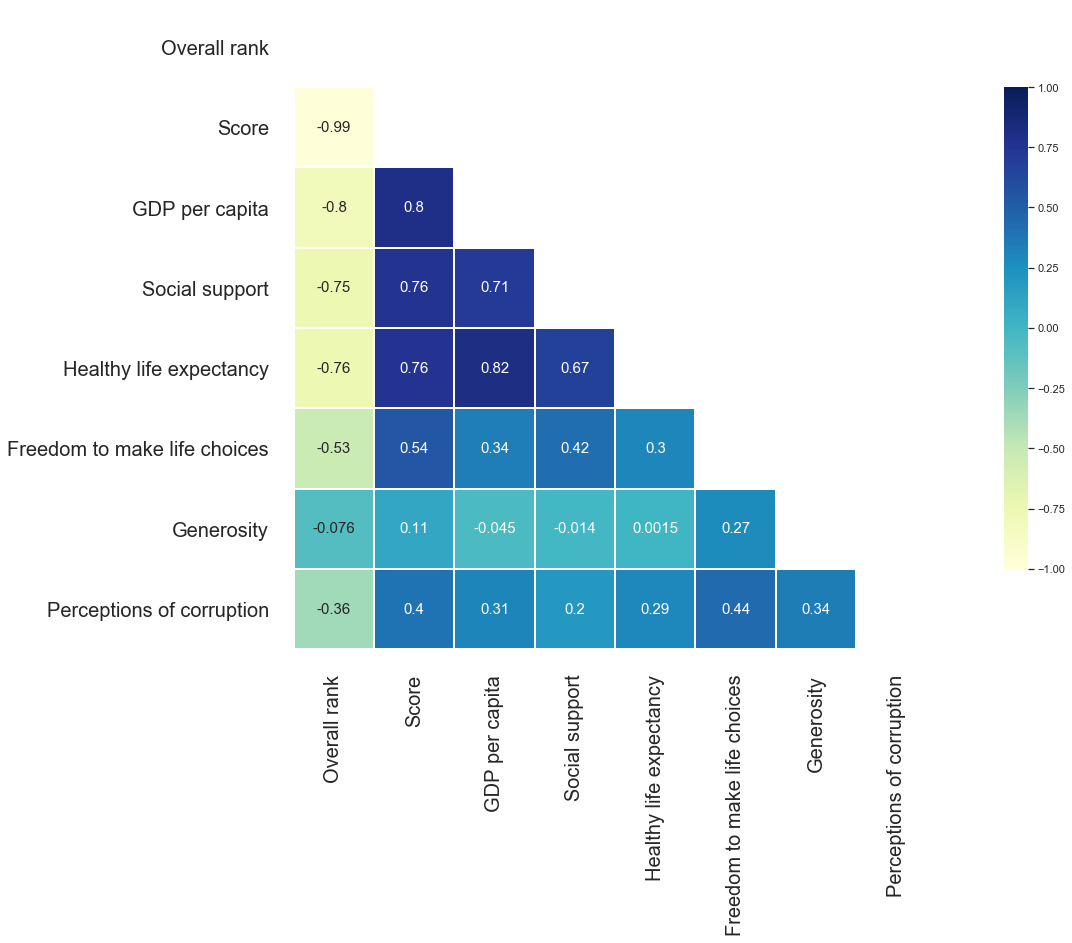

In [5]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

corr = df.corr()

# To hide part of the correlation matrix
hide = np.triu(np.ones_like(corr, dtype = np.bool))

ax = sns.heatmap(corr, mask = hide, annot = True, cmap = 'YlGnBu', 
                 vmax = 1, center = 0, vmin = -1,
                 square = True, linewidths = 1, linecolor = 'white', 
                 cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Load data of 2018 and 2019</b>
</div>

In [6]:
# You can ignore the warning
# Data of 2018 and drop some columns
df_2018 = df[df.index.year == 2018]
# Data of 2019 and drop some columns
df_2019 = df[df.index.year == 2019]

<div class="alert alert-block alert-info">
<b>Score by contry or region in 2019</b>
</div>

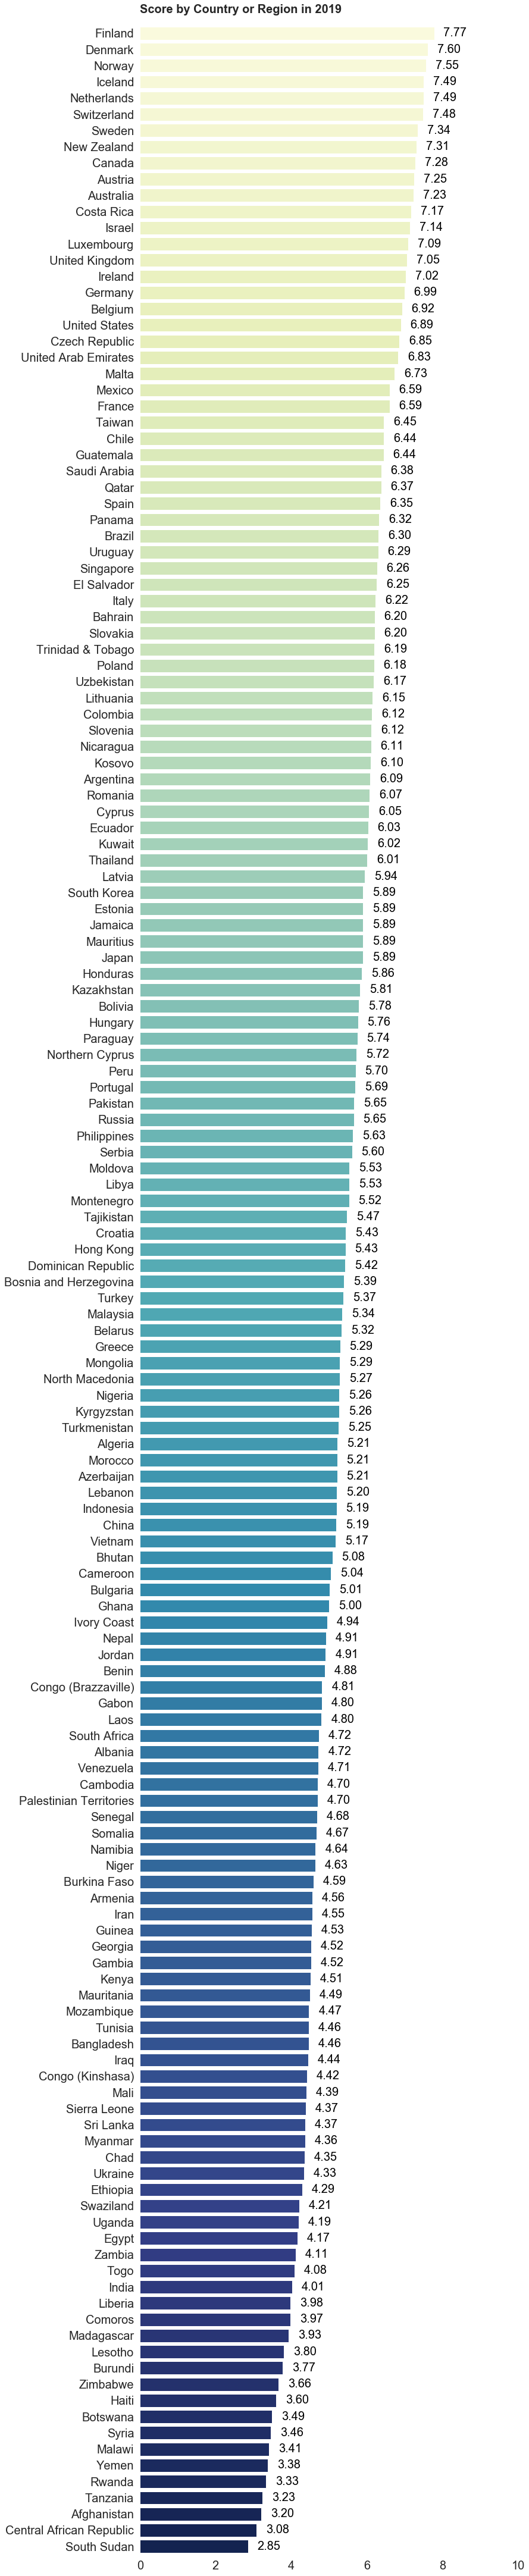

In [7]:
plt.figure(figsize = (10, 60))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()                                               

ax = sns.barplot(x = df_2019['Score'], y = df_2019['Country or region'],  
                 orient = 'h', palette = 'YlGnBu')

for p in ax.patches:
    width = p.get_width() # get bar length
    ax.text(width+0.25, # set the text at 1 unit right of the bar
            p.get_y() + p.get_height()/2, # get Y coordinate + X coordinate / 2
            '{:.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', # vertical alignment
            fontsize = 20, color = 'black') # font

ax.set_title('Score by Country or Region in 2019', loc = 'left', weight = 'bold', fontsize = 20, pad = 20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis = 'both', length = 0, pad = 10)
sns.despine(left = True, bottom = True)
ax.set_xlim(0, 10)
plt.show()

<div class="alert alert-block alert-info">
<b>Best healthy life expectancy</b>
</div>

In [8]:
df_2019_10 = df_2019.head(10)

df_2019_10_sorted = df_2019_10.sort_values(by = 'Healthy life expectancy', ascending = False)
df_2019_10_sorted 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
date,,,,,,,,,
2019-01-01,6,Switzerland,7.48,1.45,1.53,1.05,0.57,0.26,0.34
2019-01-01,9,Canada,7.28,1.36,1.50,1.04,0.58,0.28,0.31
2019-01-01,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34
2019-01-01,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12
2019-01-01,8,New Zealand,7.31,1.30,1.56,1.03,0.58,0.33,0.38
2019-01-01,10,Austria,7.25,1.38,1.48,1.02,0.53,0.24,0.23
2019-01-01,7,Sweden,7.34,1.39,1.49,1.01,0.57,0.27,0.37
2019-01-01,5,Netherlands,7.49,1.40,1.52,1.00,0.56,0.32,0.30
2019-01-01,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41


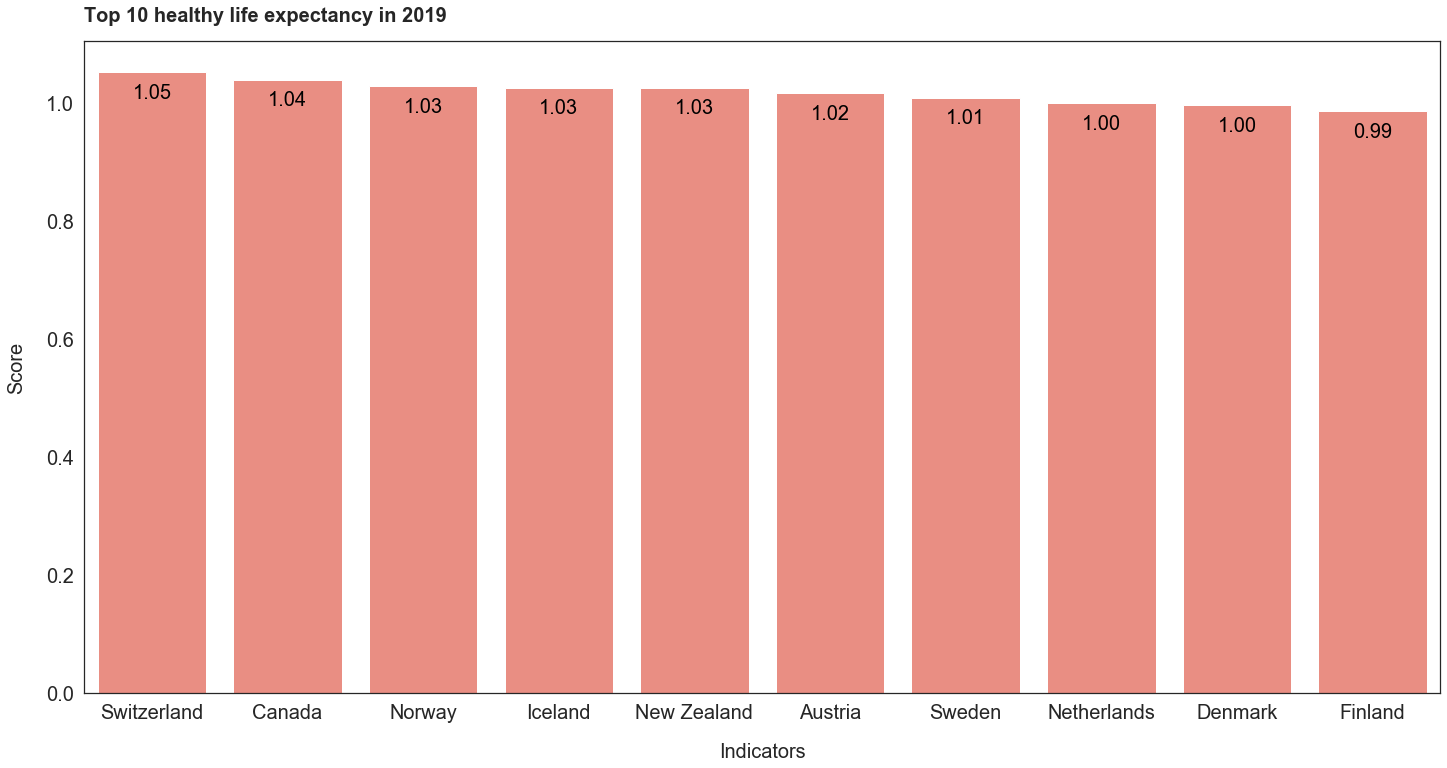

In [9]:
plt.figure(figsize = (20, 10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()                                               

ax = sns.barplot(x = df_2019_10_sorted['Country or region'], 
                 y = df_2019_10_sorted['Healthy life expectancy'],  
                 orient = 'v', color = 'salmon')

for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
    ha = 'center', va = 'center', fontsize = 20, color = 'black', xytext = (0, -20),
    textcoords = 'offset points')

ax.set_title('Top 10 healthy life expectancy in 2019', loc = 'left', 
             weight = 'bold', fontsize = 20, pad = 20)
ax.set_xlabel('Indicators', fontsize = 20, labelpad = 20)
ax.set_ylabel('Score', fontsize = 20, labelpad = 20)
ax.tick_params(axis = 'both', length = 0, pad = 10)
plt.show()

<div class="alert alert-block alert-info">
<b>Finland indicators score</b>
</div>

In [10]:
df_finland = df_2019[df_2019['Country or region'] == 'Finland'].copy()
df_finland.drop(['Score', 'Country or region'], axis = 1, inplace = True)
df_finland = df_finland.stack().reset_index().rename(columns = {'level_1': 'indicators', 0: 'score'})
df_finland.set_index('date', inplace = True)
df_finland_sorted = df_finland.sort_values(by = 'score', ascending = False)
df_finland_sorted

,indicators,score
date,,
2019-01-01,Social support,1.59
2019-01-01,GDP per capita,1.34
2019-01-01,Overall rank,1.00
2019-01-01,Healthy life expectancy,0.99
2019-01-01,Freedom to make life choices,0.60
2019-01-01,Perceptions of corruption,0.39
2019-01-01,Generosity,0.15


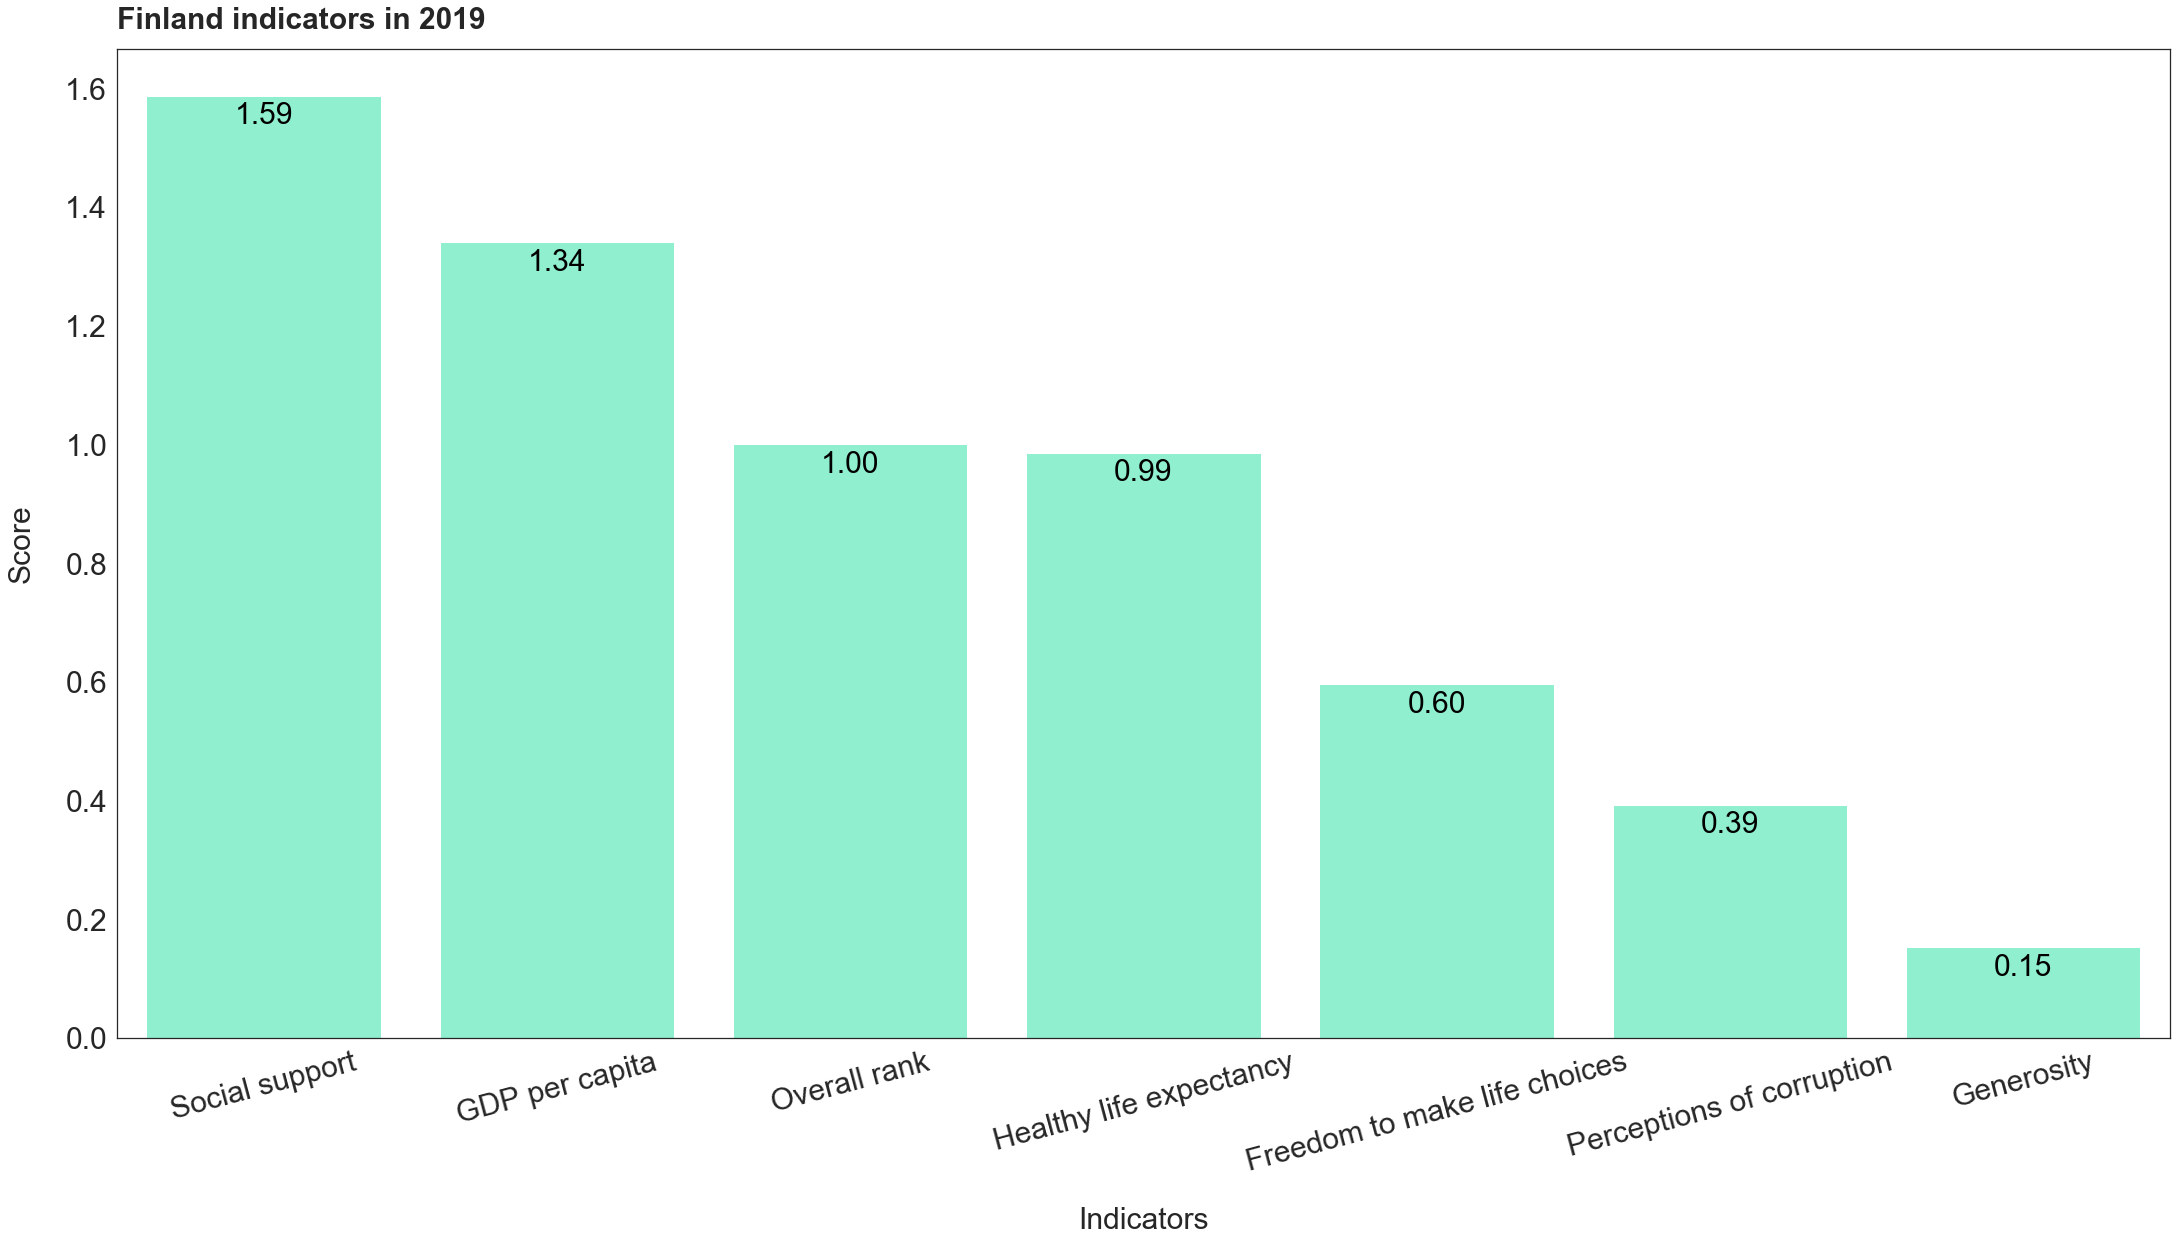

In [11]:
plt.figure(figsize = (30, 15))
plt.xticks(fontsize = 30, rotation = 15)
plt.yticks(fontsize = 30)
plt.tight_layout()                                               

ax = sns.barplot(x = df_finland_sorted['indicators'],
                 y = df_finland_sorted['score'],  
                 orient = 'v', color = 'aquamarine')

for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()),
    ha = 'center', va = 'center', fontsize = 30, color = 'black', xytext = (0, -20),
    textcoords = 'offset points')

ax.set_title('Finland indicators in 2019', loc = 'left', 
             weight = 'bold', fontsize = 30, pad = 20)
ax.set_xlabel('Indicators', fontsize = 30, labelpad = 30)
ax.set_ylabel('Score', fontsize = 30, labelpad = 30)
ax.tick_params(axis = 'both', length = 0, pad = 10)
plt.show()